# Entregable 1 (RNN)
Por Carlos Sánchez Polo
Asignatura Deep Learning

## Enunciado:

Aplicación de SimpleRNN a:
1. Dataset IMDB de Keras (https://keras.io/api/datasets/imdb/),
2. Otro Dataset de Keras o TensorFlow (https://keras.io/api/datasets/, https://www.tensorflow.org/datasets/catalog/overviewhl=%20es#all_datasets)

In [1]:
#!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing import sequence


from keras import models
from keras import layers

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
maxlen = 1000
x_train = sequence.pad_sequences(train_data, maxlen=maxlen)
x_test = sequence.pad_sequences(test_data, maxlen=maxlen)

In [5]:
from keras import regularizers

max_words = 10000
embedding_dim = 32

# Definir el modelo
model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(x_train, 
                    train_labels, 
                    epochs=15,
                    batch_size=512, 
                    validation_split=0.2)
                    


Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.5099 - loss: 0.9169 - val_accuracy: 0.4994 - val_loss: 0.6934
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7028 - loss: 0.6335 - val_accuracy: 0.8210 - val_loss: 0.4931
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.8672 - loss: 0.4327 - val_accuracy: 0.8578 - val_loss: 0.4198
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.8957 - loss: 0.3645 - val_accuracy: 0.8694 - val_loss: 0.3849
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9110 - loss: 0.3216 - val_accuracy: 0.8596 - val_loss: 0.3948
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9253 - loss: 0.2967 - val_accuracy: 0.8746 - val_loss: 0.3725
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9295 - loss: 0.2859 - val_accuracy: 0.8720 - val_loss: 0.3642
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9307 - loss: 0.2697 - val_accuracy: 0.

In [7]:
val_acc_train = history.history['accuracy']
val_acc_test = history.history['val_accuracy']

results = model.evaluate(x_test, test_labels)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8645 - loss: 0.3898


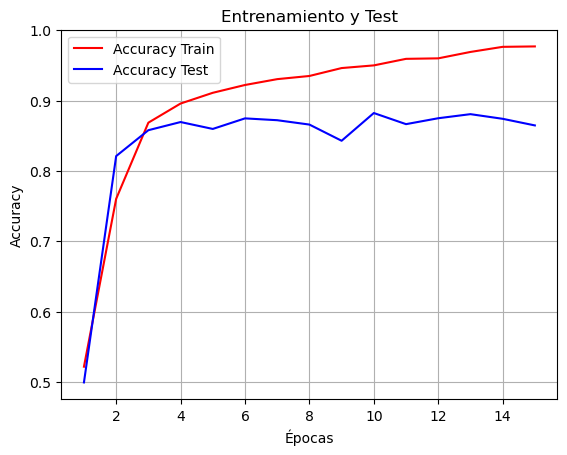

In [8]:
import matplotlib.pyplot as plt


epochs = range(1, len(val_acc_train) + 1)
plt.plot(epochs, val_acc_train, 'r', label='Accuracy Train')
plt.plot(epochs, val_acc_test, 'b',  label='Accuracy Test')
plt.title('Entrenamiento y Test')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()


## RNN con yelp_review_full_csv

In [47]:
path_train="yelp_review_full_csv/train.csv"
path_test="yelp_review_full_csv/test.csv"

# Cargar el 10% de las filas del archivo train.csv
train_data_2 = pd.read_csv(path_train).sample(frac=0.15, random_state=42)

# Separar características (data) y etiquetas (labels) para train
train_labels_2 = train_data_2.iloc[:, 0]  # La primera columna contiene las etiquetas
train_data_2 = train_data_2.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Cargar el 10% de las filas del archivo test.csv
test_data_2 = pd.read_csv(path_test).sample(frac=0.25, random_state=42)

# Separar características (data) y etiquetas (labels) para test
test_labels_2 = test_data_2.iloc[:, 0]  # La primera columna contiene las etiquetas
test_data_2 = test_data_2.iloc[:, 1]  # Las características están en todas las columnas excepto la primera

# Verificar el tamaño de las muestras
print("Tamaño del conjunto de entrenamiento (data):", len(train_data_2))
print("Tamaño del conjunto de prueba (data):", len(test_data_2))
print("Tamaño del conjunto de entrenamiento (labels):", len(train_labels_2))
print("Tamaño del conjunto de prueba (labels):", len(test_labels_2))


Tamaño del conjunto de entrenamiento (data): 97500
Tamaño del conjunto de prueba (data): 12500
Tamaño del conjunto de entrenamiento (labels): 97500
Tamaño del conjunto de prueba (labels): 12500


In [48]:
from keras.utils import to_categorical

# Convertir train_labels_2 a one-hot encoding
train_labels_2_encoded = to_categorical(train_labels_2 - 1)

# Convertir test_labels_2 a one-hot encoding
test_labels_2_encoded = to_categorical(test_labels_2 - 1)


In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer

maxlen_2 = 80
max_num_words= 300
ignore_top_words= 10

# Inicializa un Tokenizer
tokenizer = Tokenizer(num_words=max_num_words)

# Ajusta el Tokenizer a tus datos de entrenamiento
tokenizer.fit_on_texts(train_data_2)

# Get the word counts
word_counts = tokenizer.word_counts

# Sort the word counts and get the 10 most common words
most_common_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:ignore_top_words]
most_common_words = [word for word, count in most_common_words]

# Adjust the word index of the tokenizer
for word in most_common_words:
    del tokenizer.word_index[word]
    del tokenizer.word_docs[word]
    del tokenizer.word_counts[word]

# Now you can convert your texts into sequences
train_data_2_token = tokenizer.texts_to_sequences(train_data_2)
test_data_2_token  = tokenizer.texts_to_sequences(test_data_2)

# Ahora puedes aplicar sequence.pad_sequences
x_train_2 = sequence.pad_sequences(train_data_2_token, maxlen=maxlen_2)
x_test_2 = sequence.pad_sequences(test_data_2_token, maxlen=maxlen_2)

In [50]:

embedding_dim = 100
num_classes = 5

model_2 = models.Sequential()
model_2.add(layers.Embedding(input_dim=maxlen_2, output_dim=embedding_dim))
model_2.add(layers.SimpleRNN(64, return_sequences=True))
model_2.add(layers.SimpleRNN(32))  
model_2.add(layers.Dropout(0.1))  
model_2.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(layers.Dense(num_classes, activation='softmax'))


# Compilar el modelo
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
history_2 = model_2.fit(x_train_2,
                        train_labels_2_encoded,
                        epochs=20,
                        batch_size=1024,
                        validation_data=(x_test_2, test_labels_2_encoded))


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 232ms/step - accuracy: 0.2567 - loss: 1.9485 - val_accuracy: 0.3196 - val_loss: 1.6007
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 281ms/step - accuracy: 0.3533 - loss: 1.5372 - val_accuracy: 0.3891 - val_loss: 1.4334
Epoch 3/20
62/96 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.3885 - loss: 1.4265

KeyboardInterrupt: 

In [ ]:

val_acc_train_2 = history_2.history['accuracy']
val_acc_test_2 = history_2.history['val_accuracy']


In [ ]:

results_2 = model_2.evaluate(x_test_2, test_labels_2)

